In [1]:
from tqdm import tqdm
import pickle

import sys 
sys.path.append("../")

import pandas as pd
import itertools 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
from scipy.stats import pearsonr
import numpy as np

def plot_scatter_v1(df, trait):
    df = df.loc[:, [trait, f'{trait}(third)']]
    x = np.arange(2, 14, 0.1)
    plt.plot(x, x)
    plt.scatter(df.loc[:, trait], df.loc[:, f"{trait}(third)"])
    plt.title(trait)
    plt.xlabel("self annotation")
    plt.ylabel("third person annotation")
    plt.show()
    df_cor = df.corr()
    print(df_cor)
    calc_p(df)

def calc_p(df):
    for i, j in itertools.combinations(df, 2):
        x = df.loc[:, [i]].values 
        y = df.loc[:, [j]].values 
        a, b = pearsonr(np.ravel(x), np.ravel(y))
        if 0 != b.round(10) < 0.10:
            print("=" * 45)
            print(i + "----" + j)
            print("correlation coeffieient : ", a.round(4))
            print("p value : ", b.round(4))
    print("\n")

with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    SS_1911, TS_1911, SP_1911, TP_1911, text_1911, audio_1911, visual_1911, bio_1911, vid_1911 = pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi2010_features.pkl', mode='rb') as f:
    SS_2010, TS_2010, SP_2010, TP_2010, text_2010, audio_2010, visual_2010, vid_2010 = pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi2012_features.pkl', mode='rb') as f:
    SS_2012, TS_2012, SP_2012, TP_2012, text_2012, audio_2012, visual_2012, vid_2012 = pickle.load(f, encoding='utf-8')

In [14]:
low = 0 
mid = 0 
high = 0 
for id in vid_1911:
    for d in SS_1911[id]:
        if d == 0:
            low += 1
        elif d == 1:
            mid += 1 
        else:
            high +=1
all = low+mid+high
print(high/all)
print(low, mid, high, all)

low = 0 
mid = 0 
high = 0 
for id in vid_1911:
    for d in TS_1911[id]:
        if d == 0:
            low += 1
        elif d == 1:
            mid += 1 
        else:
            high +=1
all = low+mid+high
print(high/all)
print(low, mid, high, all)

0.4534645346453465
485 848 1106 2439
0.5658056580565806
178 881 1380 2439


# Hazumi1911のみ

In [54]:
df_third = pd.DataFrame.from_dict(TP_1911, orient="index", columns=["E(third)","A(third)", "C(third)", "N(third)", "O(third)"])

df_self = pd.DataFrame.from_dict(SP_1911, orient="index", columns=["E","A", "C", "N", "O"])

df = pd.concat([df_self, df_third], axis=1)
df["diff(E)"] = df["E"] - df["E(third)"]
df["diff(A)"] = df["A"] - df["A(third)"]
df["diff(C)"] = df["C"] - df["C(third)"]
df["diff(N)"] = df["N"] - df["N(third)"]
df["diff(O)"] = df["O"] - df["O(third)"]

traits = ["E", "A", "C", "N", "O"]
for trait in traits:
    _df = df.loc[:, [f"{trait}(third)", "diff(E)", "diff(A)", "diff(C)", "diff(N)", "diff(O)"]]
    print(f"trait : {trait}")
    print(round(_df.corr()[f'{trait}(third)'], 2))
    calc_p(_df)

trait : E
E(third)    1.00
diff(E)    -0.47
diff(A)    -0.29
diff(C)     0.13
diff(N)    -0.17
diff(O)    -0.34
Name: E(third), dtype: float64
E(third)----diff(E)
correlation coeffieient :  -0.4716
p value :  0.015
E(third)----diff(O)
correlation coeffieient :  -0.3415
p value :  0.0877


trait : A
A(third)    1.00
diff(E)     0.07
diff(A)    -0.43
diff(C)    -0.30
diff(N)     0.14
diff(O)    -0.40
Name: A(third), dtype: float64
A(third)----diff(A)
correlation coeffieient :  -0.4332
p value :  0.027
A(third)----diff(O)
correlation coeffieient :  -0.4036
p value :  0.0409


trait : C
C(third)    1.00
diff(E)     0.37
diff(A)    -0.22
diff(C)     0.06
diff(N)     0.25
diff(O)    -0.16
Name: C(third), dtype: float64
C(third)----diff(E)
correlation coeffieient :  0.3733
p value :  0.0603


trait : N
N(third)    1.00
diff(E)    -0.21
diff(A)     0.29
diff(C)    -0.14
diff(N)    -0.15
diff(O)     0.17
Name: N(third), dtype: float64


trait : O
O(third)    1.00
diff(E)    -0.08
diff(A)    -0.

# Hazumi1911と2010の統合

In [51]:
def get_updatedict(Xs):
    res = {} 
    for x in Xs:
        res.update(x)
    return res

def get_extendlist(Xs):
    res = []
    for x in Xs:
        res.extend(x)
    return res

SP = get_updatedict([SP_1911, SP_2010])
TP = get_updatedict([TP_1911, TP_2010])
vid = get_extendlist([vid_1911, vid_2010])

df_third = pd.DataFrame.from_dict(TP, orient="index", columns=["E(third)","A(third)", "C(third)", "N(third)", "O(third)"])

df_self = pd.DataFrame.from_dict(SP, orient="index", columns=["E","A", "C", "N", "O"])

df = pd.concat([df_self, df_third], axis=1)
df["diff(E)"] = df["E"] - df["E(third)"]
df["diff(A)"] = df["A"] - df["A(third)"]
df["diff(C)"] = df["C"] - df["C(third)"]
df["diff(N)"] = df["N"] - df["N(third)"]
df["diff(O)"] = df["O"] - df["O(third)"]

traits = ["E", "A", "C", "N", "O"]
for trait in traits:
    _df = df.loc[:, [f"{trait}(third)", "diff(E)", "diff(A)", "diff(C)", "diff(N)", "diff(O)"]]
    print(f"trait : {trait}")
    print(round(_df.corr()[f'{trait}(third)'], 2))
    calc_p(_df)

trait : E
E(third)    1.00
diff(E)    -0.41
diff(A)    -0.24
diff(C)    -0.01
diff(N)     0.02
diff(O)    -0.23
Name: E(third), dtype: float64
E(third)----diff(E)
correlation coeffieient :  -0.4094
p value :  0.0013
E(third)----diff(A)
correlation coeffieient :  -0.2429
p value :  0.0637
E(third)----diff(O)
correlation coeffieient :  -0.2346
p value :  0.0737
diff(E)----diff(O)
correlation coeffieient :  0.3117
p value :  0.0162
diff(A)----diff(N)
correlation coeffieient :  -0.2706
p value :  0.0382
diff(C)----diff(N)
correlation coeffieient :  -0.4957
p value :  0.0001


trait : A
A(third)    1.00
diff(E)     0.08
diff(A)    -0.62
diff(C)    -0.11
diff(N)     0.14
diff(O)    -0.25
Name: A(third), dtype: float64
A(third)----diff(A)
correlation coeffieient :  -0.619
p value :  0.0
A(third)----diff(O)
correlation coeffieient :  -0.2471
p value :  0.0592
diff(E)----diff(O)
correlation coeffieient :  0.3117
p value :  0.0162
diff(A)----diff(N)
correlation coeffieient :  -0.2706
p value :  

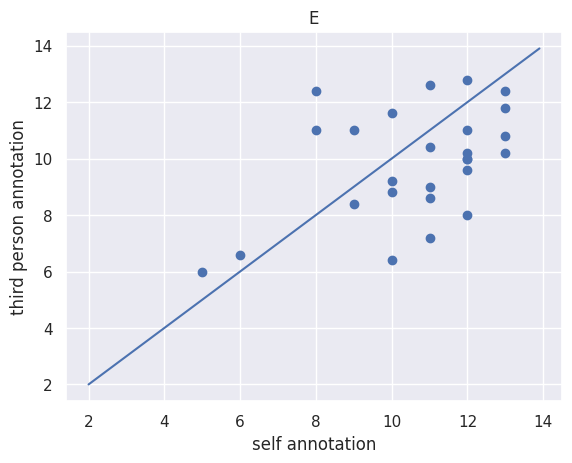

                 E  E(third)
E         1.000000  0.453458
E(third)  0.453458  1.000000
E----E(third)
correlation coeffieient :  0.4535
p value :  0.02




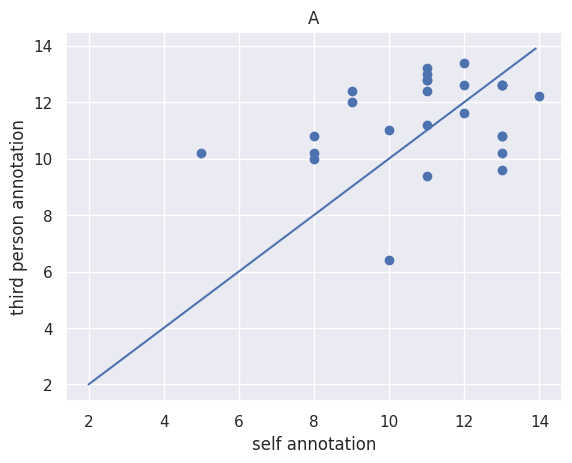

                 A  A(third)
A         1.000000  0.281473
A(third)  0.281473  1.000000




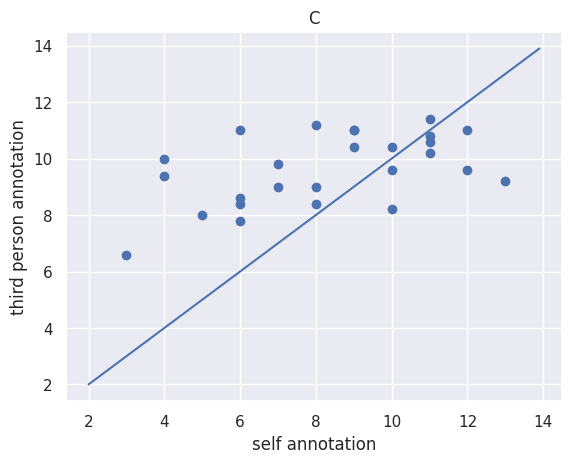

                 C  C(third)
C         1.000000  0.509961
C(third)  0.509961  1.000000
C----C(third)
correlation coeffieient :  0.51
p value :  0.0078




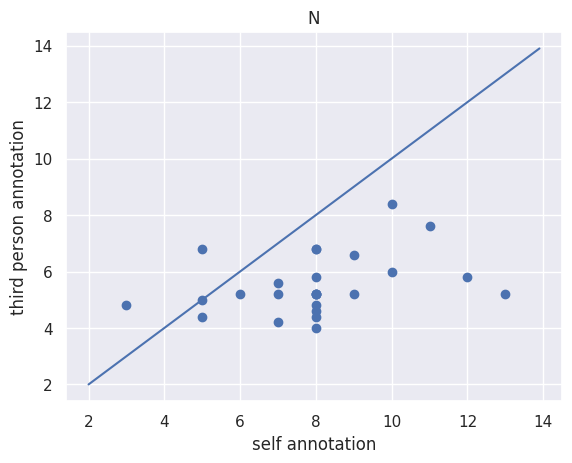

                 N  N(third)
N         1.000000  0.345125
N(third)  0.345125  1.000000
N----N(third)
correlation coeffieient :  0.3451
p value :  0.0842




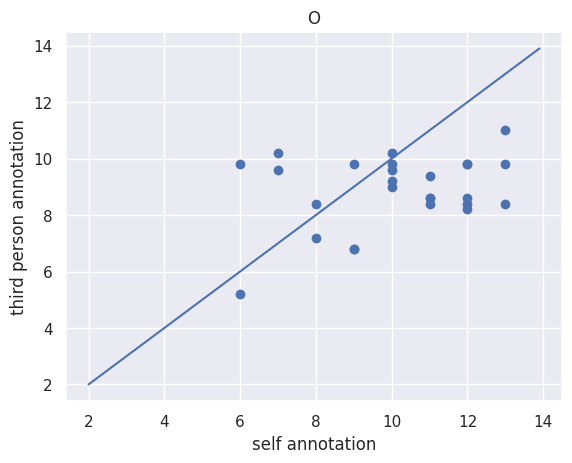

                 O  O(third)
O         1.000000  0.301735
O(third)  0.301735  1.000000




In [55]:
def show_stats(df, trait):
    print(df.loc[:, trait].describe())

def show_third_person_stats(df, trait):
    print(df.loc[:, f"{trait}(third)"].describe())
    
for trait in traits:
    plot_scatter_v1(df, trait)
    # print(f"self annotation {trait}")
    # show_stats(df, trait)
    # print(f"third person annotation {trait}")
    # show_third_person_stats(df, trait)